In [2]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


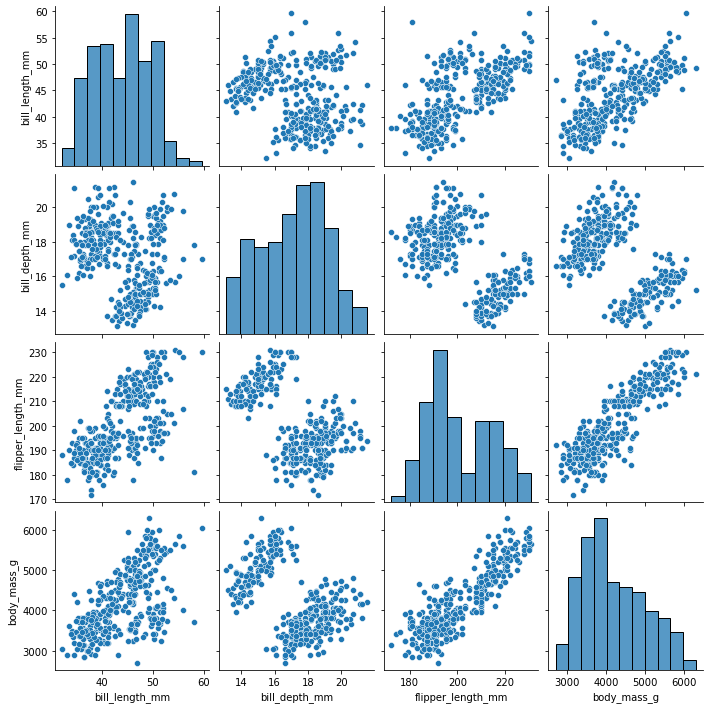

In [4]:
sns.pairplot(penguins)

In [5]:
penguins['bill_length_mm'] = penguins['bill_length_mm'].fillna(value=penguins['bill_length_mm'].mean())
penguins['bill_depth_mm'] = penguins['bill_depth_mm'].fillna(value=penguins['bill_depth_mm'].mean())
penguins['flipper_length_mm'] = penguins['flipper_length_mm'].fillna(value=penguins['flipper_length_mm'].mean())
penguins['body_mass_g'] = penguins['body_mass_g'].fillna(value=penguins['body_mass_g'].mean())
penguins['sex'] = penguins['sex'].fillna(value='Male')

In [6]:
features = ['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']
km = KMeans(n_clusters=2, random_state=42).fit(penguins[features])

In [7]:
penguins['cluster'] = km.predict(penguins[features])

In [8]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male,0
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female,0
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female,0
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male,0
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female,0


In [9]:
penguins.cluster.value_counts()

0    211
1    133
Name: cluster, dtype: int64

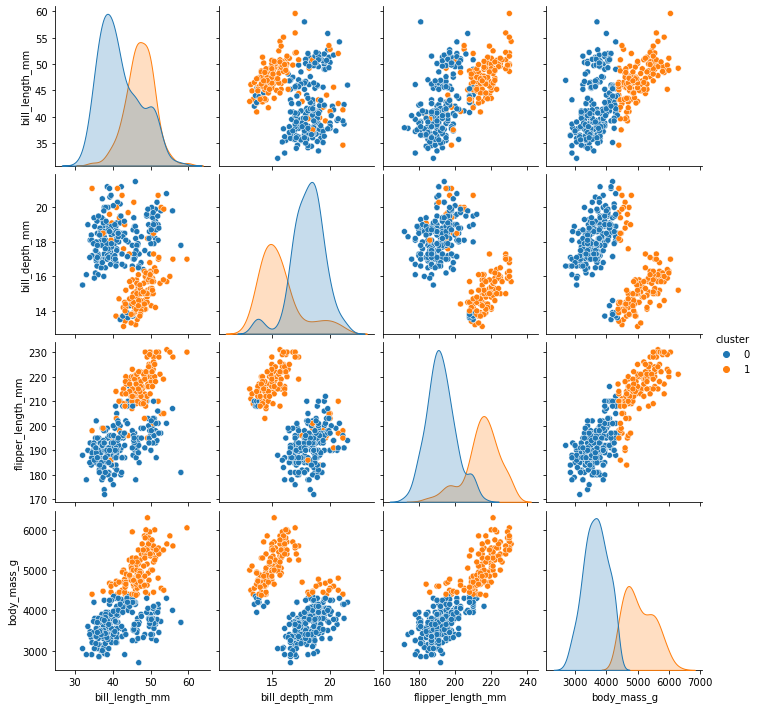

In [10]:
sns.pairplot(penguins, hue="cluster")

In [11]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [12]:
# You can change the features and n_clusters in the k-means above and check the impact on the Silhouette Coefficient
metrics.silhouette_score(penguins[features], km.labels_, metric='euclidean')

0.6270788983213472

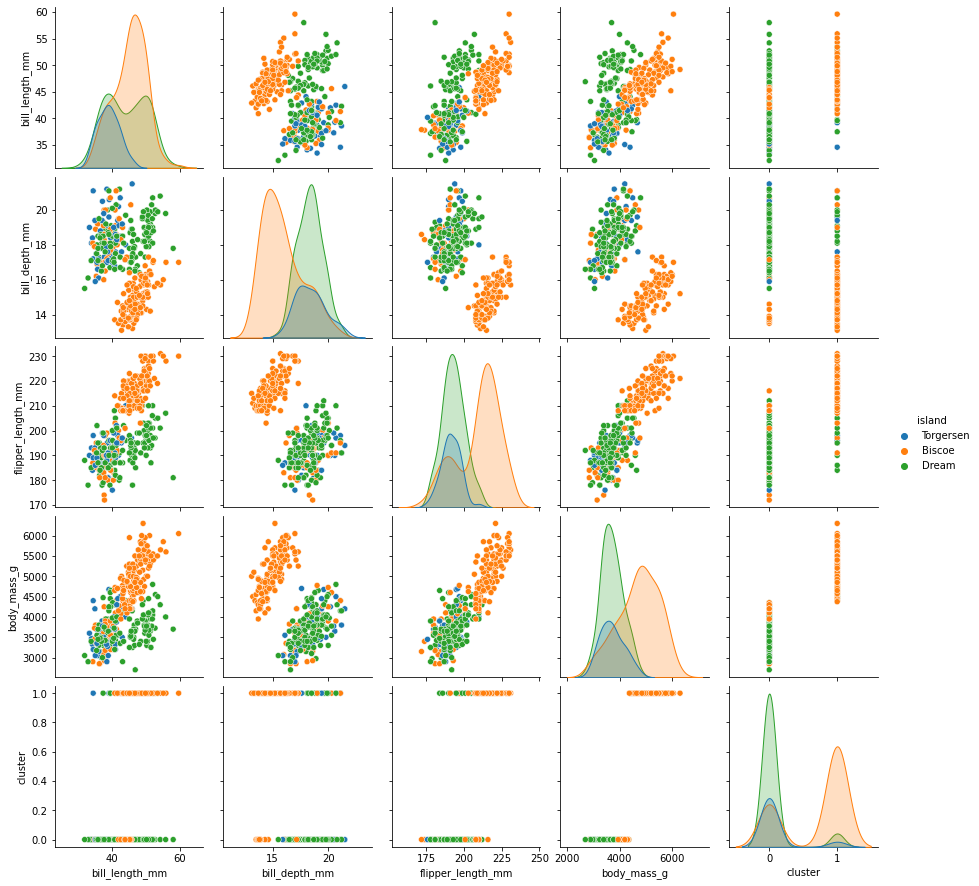

In [14]:
sns.pairplot(penguins, hue="island")

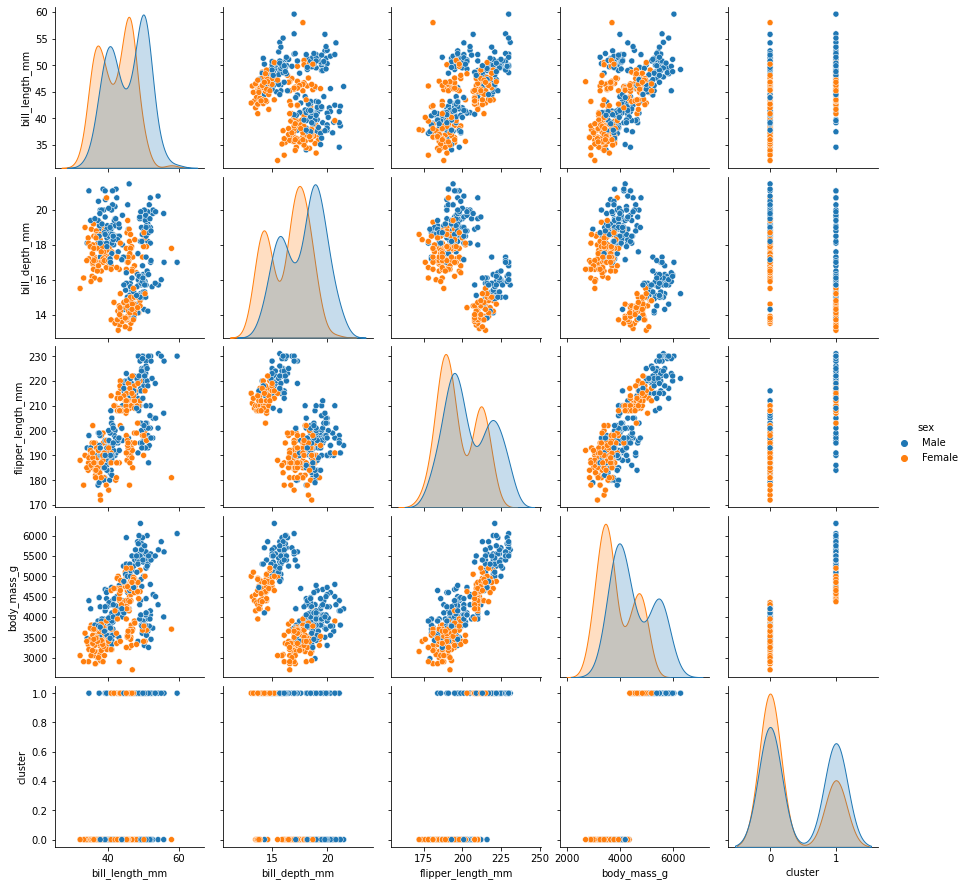

In [15]:
sns.pairplot(penguins, hue="sex")

In [16]:
contingency_table = penguins.groupby(['species','cluster']).size().unstack('cluster', fill_value=0)
contingency_table

cluster,0,1
species,,
Adelie,138,14
Chinstrap,63,5
Gentoo,10,114


De species zijn over het algemeen goed verdeelt in de clusters, er zijn wel een paar penguins die niet in de cluster zitten waar ze horen te zitten.